# Cardio Good Fitness Project

### The project consists of analyzing the characeristics of treadmill customers with respect to three models of treadmills. At the end of the project we provide some conclusions stemming from the data analysis as well as some recommendations for the business to maintain and improve the business revenue.

## Data structure and due diligence


#### - Overview of the dataset shape, datatypes - Statistical summary and check for missing values


In [56]:
# import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

In [57]:
# Read Data Set
gym=pd.read_csv("CardioGoodFitness.csv")

In [58]:
gym.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [59]:
# Find the number of rows and columns
gym.shape

(180, 9)

In [60]:
gym.columns #shows that we have the following columns in the dataset

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#####     Product - The model no. of the treadmill
#####     Age -  Age of the customer in no of years
#####     Gender - Gender of the customer
#####     Education - Education of the customer in no. of years
#####     Marital Status - Marital status of the customer
#####     Usage - Avg. # times the customer wants to use the treadmill every week
#####     Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
#####    Income - Income of the customer
#####     Miles- Miles that a customer expects to run

In [61]:
# check for NaN values
gym.isnull().sum() #The result below indicates that there are no null (NaN) values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [62]:
#Check columns data types
gym.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [63]:
#Statistical summary of continuous columns
gym[['Age','Education','Usage','Fitness','Income','Miles']].describe() #descriptive stats of continuous columns

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [64]:
# The mean opf the population is ~29 years old, with high school completed, use the treadmill 3 to 4 times a week,
# The average customer consider themselves moderately fit, have an income of ~50k and expect to run 100 miles.

In [65]:
# The mean and the median are not very different por all cuantitative variables, except for the miles category
# The oldest person is 50 years old, and the bulk of the population has 14-16 years of education
# Very few customers use the treadmill every day. There are few customers that think of themselves as very fit.
# Most people have reasonable expectations around number of miles to run but the maximum expects more than 3 times that 
# This overachievers are rare which suggests the presence of an anomalously high expectation customers.
# There are also some outliers in the income category with a maximum income that doubles the average.

# Univariate Analyses


### Analysis of spread and distribution of every feature in the dataset.

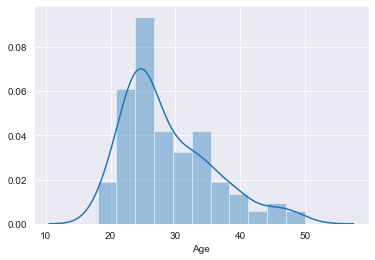

In [66]:
# Age distribution
sns.distplot(gym['Age'])  

In [67]:
# observation: the majority of customers are age 20 to 30. The age distribution is positively skewed, with a long right tail

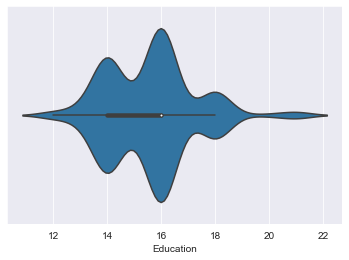

In [68]:
# Education distribution
sns.violinplot(gym['Education'])

In [69]:
# The Education distribution shows three modes interpreted as: 
# 14 (High School degree level customers), 16 (College level customers) and 18 (Graduate degree customers)

(array([ 0., 33., 69., 52., 17.,  9.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

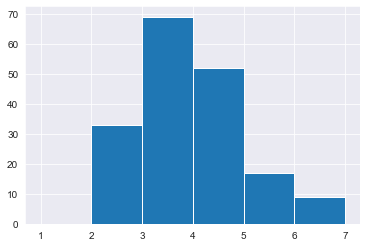

In [70]:
#Usage distribution
plt.hist(gym['Usage'], bins=[1,2,3,4,5,6,7])

In [71]:
# The Usage distribution is approximately normally distributed around 3 to 4 times a week.
# The usage has a slight skewness to the right, that suggests that a few customers use the thredmills 
# more frequently than the average customer.

(array([23., 26., 48., 41., 15.,  5.,  3.,  5., 10.,  4.]),
 array([ 29562. ,  37063.9,  44565.8,  52067.7,  59569.6,  67071.5,
         74573.4,  82075.3,  89577.2,  97079.1, 104581. ]),
 <a list of 10 Patch objects>)

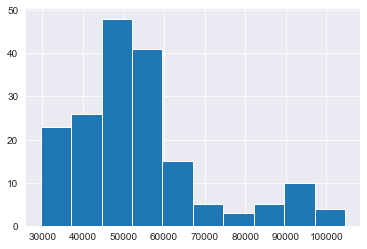

In [72]:
# Income distribution. We used a histogram with ten bins to check the income distribution of customers
plt.hist(gym['Income'], bins=10) 

In [73]:
# The income distribution is bimodal. The majority of the customers have salaries between 45k and 65k. 
# The second mode occurs around 95k. 

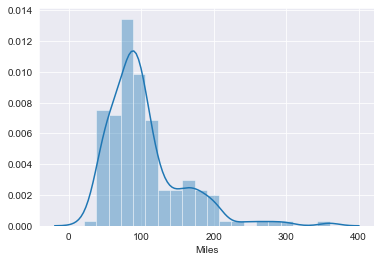

In [74]:
# Miles distribution indicates how many miles are the customers expecting to run
sns.distplot(gym['Miles']) 

In [75]:
# The miles that a customer expects to run is a skewed distribution. Most customers expect 100 miles,
# but an important number expect between 100 and 200 miles

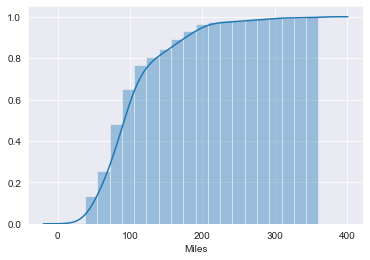

In [76]:
# Cumulative miles curve provides insights on how common is to find customers with hiogh mileage expectations
sns.distplot(gym['Miles'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

In [77]:
# The cumulative miles distribution shows that the expected number of miles per customer is mostly lower or equal than 100.
# A decrease in slope after 100 miles suggests that there is a group of customers that expect to reach 200 but these are special

# Bivariate and Multivariate Analyses


### Analysis of interaction between features, in the dataset

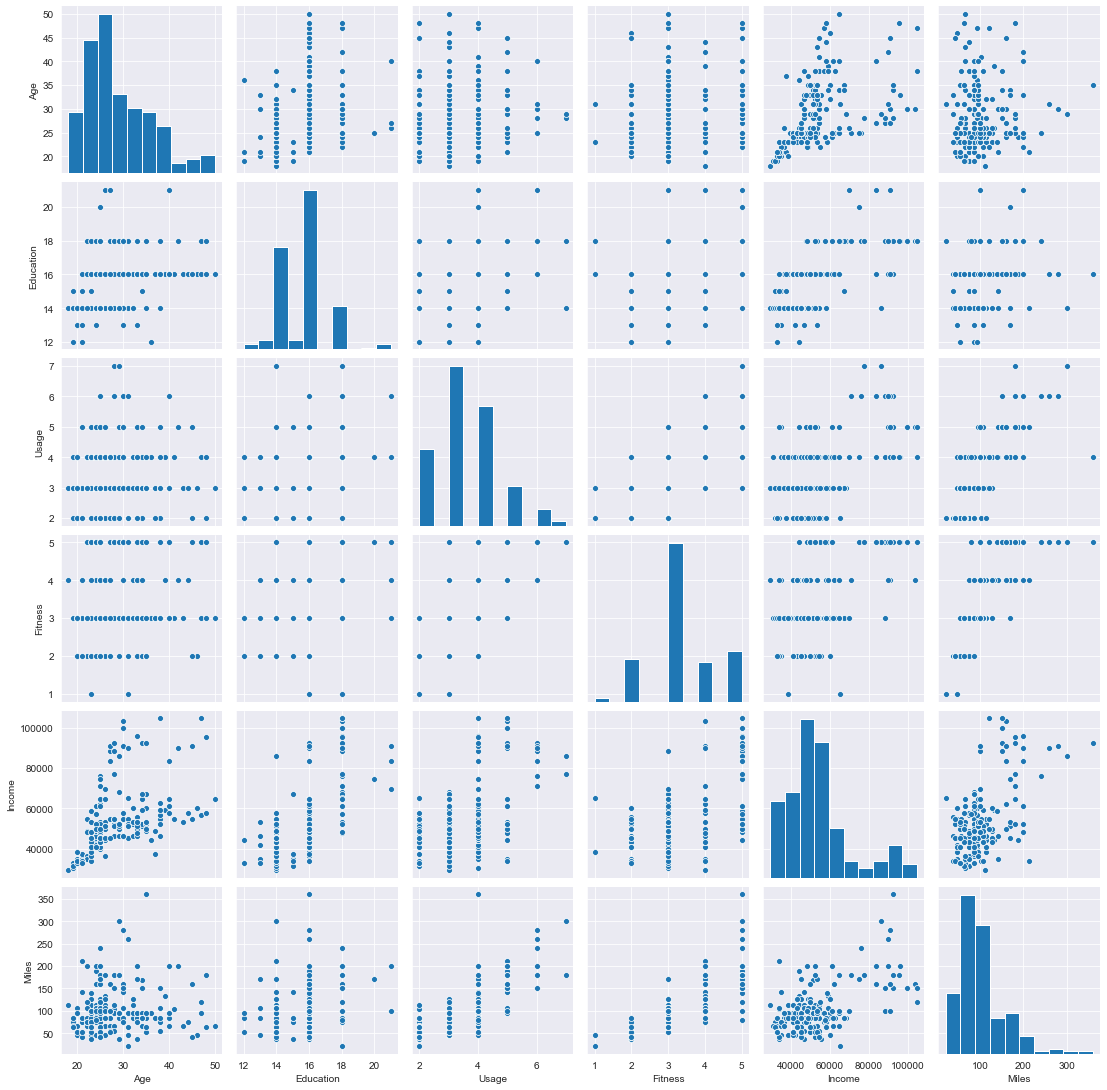

In [78]:
# First we explore graphical representations of numerical vs numerical variables.
# To take a look at the overall population at once we can use:
sns.pairplot(gym)

In [79]:
# We can explore a few of these bivariate plots more carefully.
# here appears to be a correlation between income and age. Although people with more than 80k salaries have a range of ages

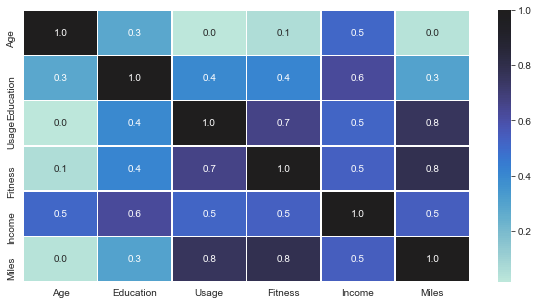

In [80]:
# xploratory analysis of positive, negative and poor correlations. Darker colors suggest higher absolute correlation
plt.figure(figsize=(10,5))
sns.heatmap(gym.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [81]:
# Positive obvious strong correlations include: 1) usage and miles, 2) fitness and miles, 3) usage and fitness. Consistent with healthier people using the machines the most
# Positive correlations also include: 1) education and income, 2) Age and income, 3) Usage and income, 4) miles nd income, and Fitness and income, but the correlation is not very strong
# Weak positive correlations include: Miles, Fitness, Usage and age with education, suggesting that education level improves higher commitment to activity
# Poor to no correlation is observed between: 1) Age and usage 2) Age and fitness and 3) Age and miles. Hence, age is not a good predictor of machine usage

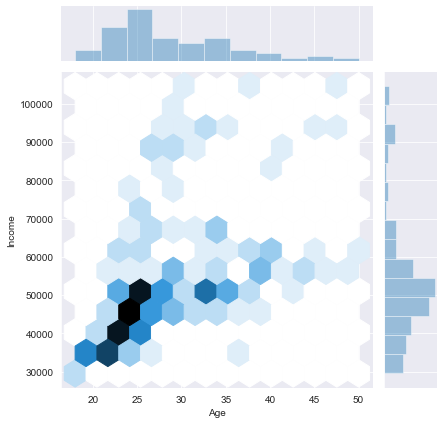

In [82]:
#We will use the hexagon option in which the darkness of the hexagons are indicative of the number of points
sns.jointplot(data = gym, x = 'Age', y = 'Income', kind="hex"); 

In [83]:
# This scatter plot suggests that the bulk of the business is in customers that are less than 35 years old
# and with incomes lower than 70k. High income and older than 40 people are "boutique" groups for this business.

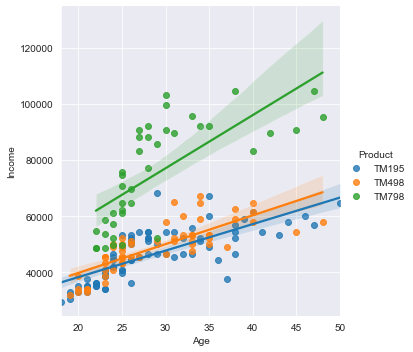

In [84]:
sns.lmplot(x='Age', y='Income', data=gym, hue='Product')

In [85]:
# A scatter plot of Age vs Income with regressions on treadmill suggests that the threadmmills 798 are preferred by higher income customers
# Treadmills 195 and 498 seem to be popular with the core customers with income <70k. It appears that regular customers are
# satisfied with simpler treadmills. This suggests that investment should continue in older/simpler treadmill models

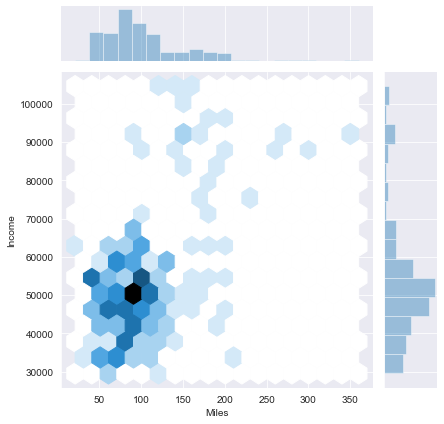

In [86]:
#Another relationship that appears to have significant correlation is expected miles to run and income
sns.jointplot(data = gym, x = 'Miles', y = 'Income', kind="hex"); 

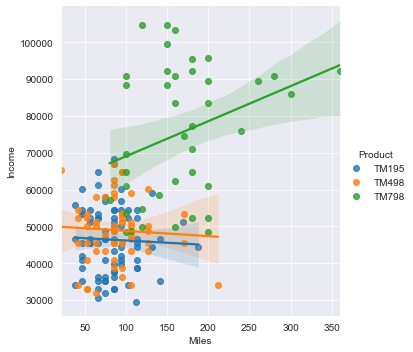

In [87]:
# The scatter plot suggests that the bulk of the customers also have lower miles expectations. The high income customers
# xpect higher number of miles to run. We will explore if there is a polarization of these customers wrt treadmills
sns.lmplot(x='Miles', y='Income', data=gym, hue='Product')

In [88]:
# The scatter plots and regressions suggest that there is a group of high income customers who also tend to use 
# model TM798 have anomalously high miles expectation

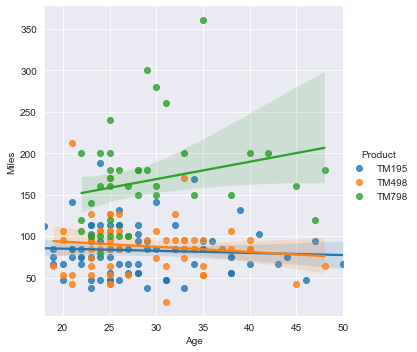

In [89]:
# We can further try to substantiate the hypothesis by exploring the scatter of Miles and Age which also appears to have 
# a correlation and see if this phenomenon also has a polarization with regards to treadmills models
sns.lmplot(x='Age', y='Miles', data=gym, hue='Product')

In [90]:
# We observe slightly lower miles expectations as age increases for those customers that use the most popular and 
# possibly simpler to operate treadmills. The anomalous group, high income, high expected mileage, shows a large scatter in
# mileage expectation but overall a counter-intuitive higher mileage expectation as their age increases. This anomalous group
# is also sticking with the more modern and technologically complex treadmills

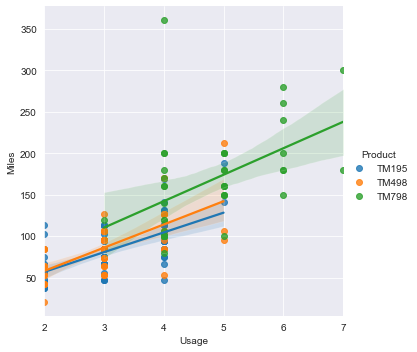

In [91]:
#T he relationship between mileage and usage is understandably positively correlated. However we do not know if there is a polarization
# of the usage similar to the polarization of insome and age with treadmills.
sns.lmplot(x='Usage', y='Miles', data=gym, hue='Product')

In [92]:
# The polarization is also present, albeit less significant. It appears that high usage persons are also using the
# most advanced treadmills

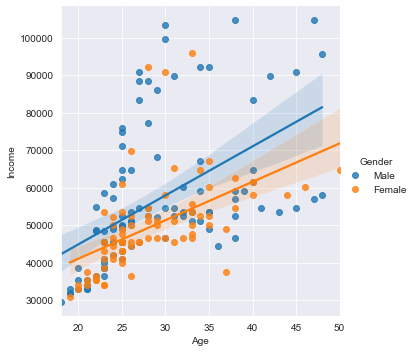

In [93]:
# We find that the majority of high income customers are male, and that overall women have lower income than men.
sns.lmplot(x='Age', y='Income', data=gym, hue='Gender')

## Numerical vs Categorical relationship exploration

In [94]:
# From the previous analysis of numerical/numerical variables it appears that there are two distint groups in the gym:
# 1) the regular customers and 2) the high income and/or older folks. 
# We will now explore some relationships with categorical variables

In [95]:
# To get a sense of the influence of population split based on gender, age and Marital Status we make some boxblots

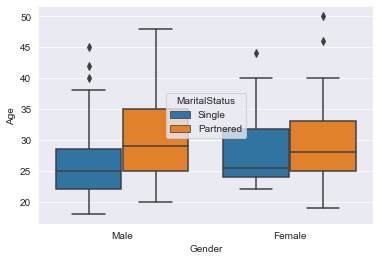

In [96]:
sns.boxplot(gym['Gender'],gym['Age'], hue=gym['MaritalStatus']);

In [97]:
# The median age of partnered (males or females) is higher than the median age of single (males or females), 
# because younger people tend to be more commoly single than older people. There are a few single old males outliers but 
# There are no male partnered outliers. The females group has few outliers insingle and partnered categories. 
# The single females median is closer to the 25% quartile than other populations, which suggest that the single female age 
# population distribution is skewed with a long tail to the right, i.e. a concentration of similar age young single females

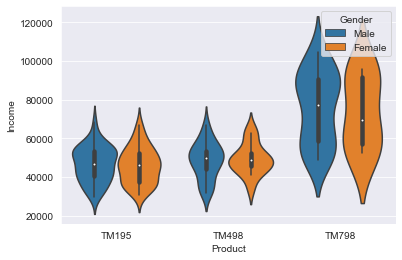

In [98]:
sns.violinplot(gym['Product'],gym['Income'], hue=gym['Gender']);

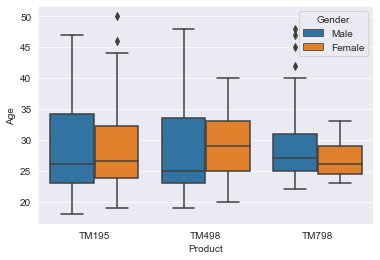

In [99]:
# This violinplot clearly shows the polarization of the population by income and treadmill, but also shows that gender plays a
# small role on the choices of treadmills. Let us explore if there is a similar relationship for age
sns.boxplot(gym['Product'],gym['Age'], hue=gym['Gender']);

In [100]:
# The interquartile age range for the regular customers is broad, but for the TM798 the range of age of the population that 
# uses these machines is genrally well clustered in the 25-30 y/o with similar male/female narrow InterQ behavior. There 
# are noticeable outliers in the male high income older age group who preferred also the advanced Treadmills. In contrast,
# outlier older women prefer the simplest, oldest Treadmill models. An interesting unexplained behaviour occurs with a 
# highly skewed distribution of age in the male group where some young individuals (~25 y/o) dominate the use of TM498

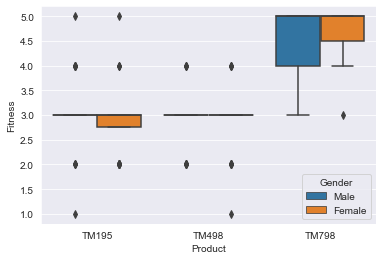

In [101]:
# It might me useful to explore if the self rated fitness level is also a predictor of the type of treadmill use. 
sns.boxplot(gym['Product'],gym['Fitness'], hue=gym['Gender']);

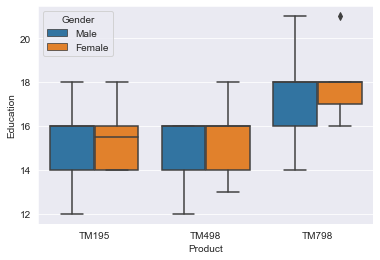

In [102]:
# The boxplot confirms that the the anomalous subgroup that prefers the high end traedmill. Outliers are common in all.
# Let us explore if the TM798 users are highly educated
sns.boxplot(gym['Product'],gym['Education'], hue=gym['Gender']);

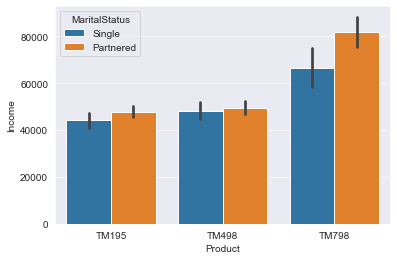

In [103]:
# Indeed the group of users of the high end treadmills are also, in average, more educated.
# but, What is the likely Marital Status of the TM798 treadmill users?
sns.barplot(gym['Product'],gym['Income'], hue=gym['MaritalStatus']); #this plot shows more partnered people each category
# the averages and 90% confidence for the treadmills TM195 and TM498 is almost statistically equivalent

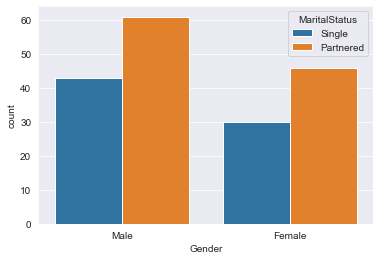

In [104]:
sns.countplot(gym['Gender'], hue=gym['MaritalStatus']); #Not much difference in relative single/partnered ratio per gender

In [105]:
#M ost customers that visit the gym are males. Partnered males are the most common customers, followed by partnered females.
# Hypothesis: partnered people have overall higher income and are older. 
# We can try to compare and contrast income and marital status to test the hypothesis
gymMS=gym.groupby(['MaritalStatus']).median()
gymMS # the table below that the hypothesis is supported by data. Partnered people have higher income and are older than single people

,Age,Education,Usage,Fitness,Income,Miles
MaritalStatus,,,,,,
Partnered,28,16,3,3,52302,85
Single,25,16,3,3,48658,95


# Conclusion


### - Conclude with the key insights/observations

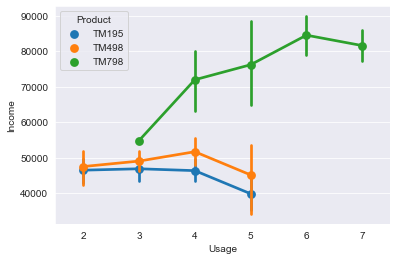

In [106]:
# With a point plot we can explore what is the relationship of income and usage and the statistical validity of results
# The clear separation of the low and high income populations with different preference for each treadmill model is clear
sns.pointplot(data = gym,x='Usage',y= 'Income', hue='Product'); 

In [107]:
# The diagram above is very clear indicating that as the income gets higher, the usage also gets higher. 
# The bulk of the business happens with regular usage by lower income bracket individuals. There is a slight tendency for
# people of the lowest income to use the oldest treadmills more which is the opposite of high income people, but this relationship 
# is not completely clear. Why these frequent users have such low income?... perhaps they are trainers?

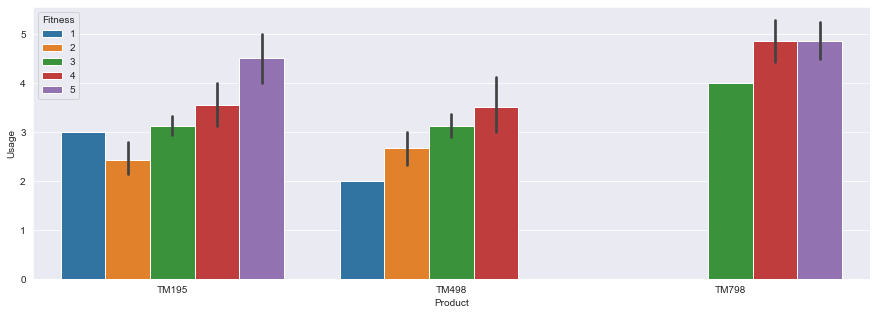

In [108]:
plt.figure(figsize=(15,5))
sns.barplot(data=gym,x='Product',y='Usage',hue='Fitness')
plt.show()

In [109]:
#The previous graph confirms the unique nature of the TM798 users. They like high tech and they are high performers that
#expect the highest mileage scores, best equipment, have higher income, more education, and generally are older and fit


# Recommendations

In [110]:
# These recommendations are based on the assumption that customers are happier when they are provided with meaningful perks. 

# In that scenario, the regular customers are the core of the business and their loyalty is key to secure continued good reviews. Special customers can generally
# pay for their heavy usage and need to be provided with special demands for high-tech. 
# The business should consider obtaining more revenue from special customers, offering services appropriate to them. 


#### 1) First priority group or regular customers: 
####    For this group: Regularly maintain, continue to acquire and have plenty of simple to use older treadmills. 
####    a. Offer assitance in the use of the equipment
####    b. consider loyalty perks with the membership
####    c. Consider referal rewards
####    d. Customer calls to encourage loyalty
####    e. Mail and email marketting designed to renew membership
#### 2) Second priority group or special customers:
####    Offer new services for high-income individuals to get them to spend more and compensate for the high usage and high 
####    expected mileage and best machines. 
####    b. VIP energy hubs 
####    c. massage and spa estra fees
####    e. sports clothing 
####    f. nutritional products
####    g. fees por special parking (valet)
####    h. fees for towels
####    e. VIP coupons with barber shops, car detailing, etc